# Importing the libraries.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import  matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression 

sns.set_style('darkgrid')

# Importing the Dataset.

In [4]:
## Dataset.
from google.colab import files
uploaded = files.upload()

Saving payment_fraud.csv to payment_fraud.csv


In [5]:
df = pd.read_csv('payment_fraud.csv')

In [6]:
df

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0
...,...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.000000,0
39217,1647,1,4.876771,creditcard,377.930556,0
39218,1591,1,4.742303,creditcard,0.000000,0
39219,237,1,4.921318,creditcard,236.082639,0


In [7]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [8]:
df.shape

(39221, 6)

In [9]:
df.tail()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
39216,986,1,4.836982,creditcard,0.000000,0
39217,1647,1,4.876771,creditcard,377.930556,0
39218,1591,1,4.742303,creditcard,0.000000,0
39219,237,1,4.921318,creditcard,236.082639,0
39220,272,1,5.040929,paypal,0.000694,0


In [10]:
df.isnull().sum() ## checking the null valeus 

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

#  Data Visualization using python libraries.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


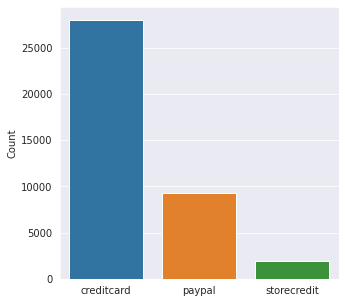

In [11]:
paymthd = df.paymentMethod.value_counts()
plt.figure(figsize=(5, 5))
sns.barplot(paymthd.index, paymthd);
plt.ylabel('Count');

In [12]:
df.label.value_counts() ## count the number of 0's and 1's

0    38661
1      560
Name: label, dtype: int64

# Label Encoding (Converting PaymentMethod coloumn into Label encoding)

In [13]:
paymthd_label = {v:k for k, v in enumerate(df.paymentMethod.unique())}

df.paymentMethod = df.paymentMethod.map(paymthd_label)

In [14]:
 df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,0,28.204861,0
1,725,1,4.742303,1,0.000000,0
2,845,1,4.921318,2,0.000000,0
3,503,1,4.886641,2,0.000000,0
4,2000,1,5.040929,2,0.000000,0


# EDA Co-relation.

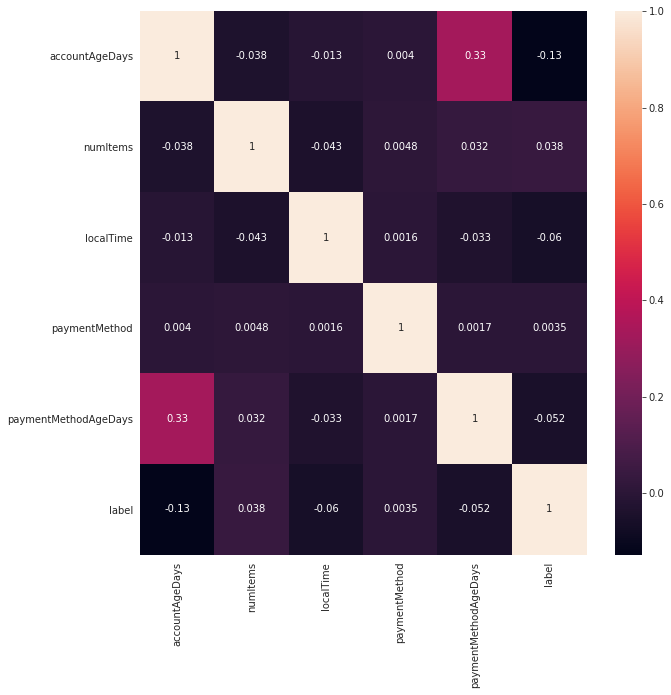

In [15]:
## corr(): it gives the correlation between the featuers
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True);

In [16]:
df.describe()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,1.084751,4.748232,1.476811,122.641326,0.014278
std,804.788212,0.566899,0.389360,0.850805,283.569177,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000,0.000000
25%,72.000000,1.000000,4.742303,1.000000,0.000000,0.000000
50%,603.000000,1.000000,4.886641,2.000000,0.012500,0.000000
75%,1804.000000,1.000000,4.962055,2.000000,87.510417,0.000000
max,2000.000000,29.000000,5.040929,2.000000,1999.580556,1.000000


## independent and dependent features

In [18]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Standard Scaling.

In [19]:
## scaling 
sc = StandardScaler()
X = sc.fit_transform(X)

## Training & spliting the dataset.

In [20]:
## train test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (29415, 5)
X_test shape:  (9806, 5)
y_train shape:  (29415,)
y_test shape:  (9806,)


## Model Building.

In [23]:
## logisticRegression Model
lg = LogisticRegression()

## training
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction.

In [24]:
## prediction 
pred = lg.predict(X_test)

----------------------------------------------------Accuracy------------------------------------------------------
0.9855190699571691

---------------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9664
           1       0.00      0.00      0.00       142

    accuracy                           0.99      9806
   macro avg       0.49      0.50      0.50      9806
weighted avg       0.97      0.99      0.98      9806


-------------------------------------------------Confustion Metrics----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


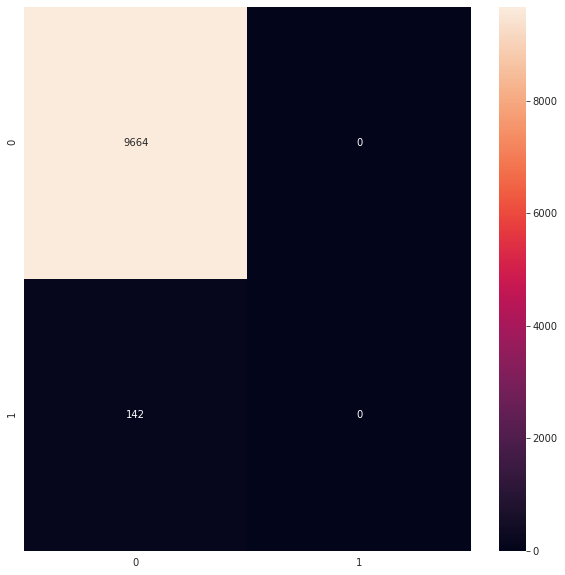

In [25]:
print("----------------------------------------------------Accuracy------------------------------------------------------")
print(accuracy_score(y_test, pred))
print()

print("---------------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))
print()

print("-------------------------------------------------Confustion Metrics----------------------------------------------------")
plt.figure(figsize=(10, 10));
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');